# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [3]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/home/maximiliano/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (4.272869843706518, 0.11807504030451817)
1    (3.1633131733997097, 0.20563416506731455)
2    (0.14748979959388817, 0.9289086283987004)
3     (1.1744938386020198, 0.5558554951610979)
4     (0.7826969625059768, 0.6761444912997729)
dtype: object

#### Interpret the normaltest results and make your observations.

We can see that the greater the p-value is, the sample is closer to a standar normal distribution. The p-value only needs to be greater than 0.05 for the null hypothesis to be rejected, therefore having p-values closer to 1 means that the sample fits a normal distribution. Also the larger the p-value the lower the statistic, as the calculated mean falls closer to the normalized test mean (0).



#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

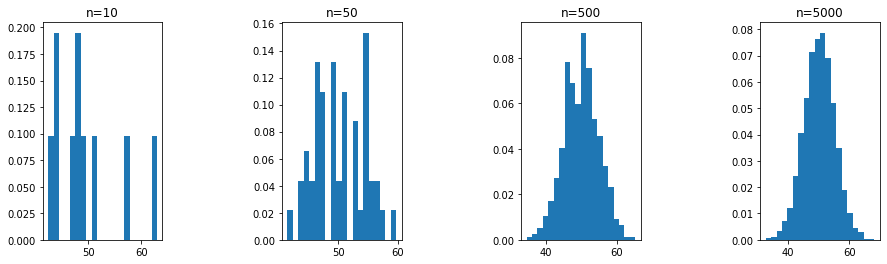

In [4]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

It seems that the larger the sample the better it fits a normal distribution. The central limit theorem states that "the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution". This is confirmed by the graphics as smaller samples have peaks or show skewed/kurtosed distributions, whereas the 50000 sample ressembles a normal distribution much better.


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

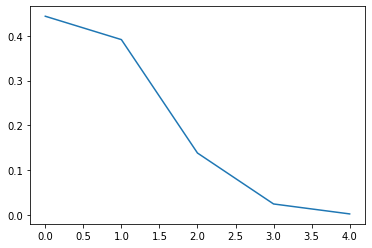

In [10]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

This plots the probability of a certain number of people clicking the Ad (all of them). The first value (at 0) is the probability that none of them clicks on the Ad, whereas the last value is the probability of all 5 of them clicking on the ad. As we can see, the propabiility of more people clicking on the Ad becomes lower and lower.

#### Now plot PMP with 50, 500, and 5000 visitors.

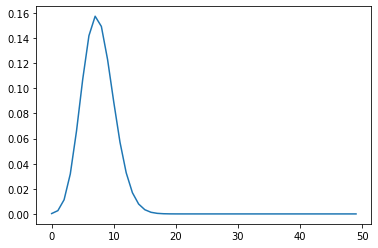

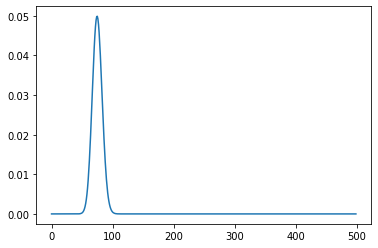

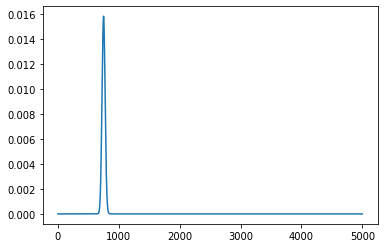

In [15]:
lista=[50,500,5000]

for i in range(len(lista)):
    n, p = lista[i], 0.15
    x = range(lista[i])

    dist = binom(lista[i], p)

    fig, ax = plt.subplots(1, 1)

    plt.plot(x, dist.pmf(x))
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

The larger the sample it's more difficult that no-one clicks on the ad, but also more unlikely for everyone to click on the Ad. That's why the PMF plot is more concentrated on a single value as the sample gets larger.
Also, we see that the peak is usually located near p multiplied by the size of the sample.


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

While the binomial distribution is related to the probability of a certain number of succesful events happening (that is: until the number of successes is reached), the poission distribution describes the probability of a certain number of events happening within a defined period based on a "rate".

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [16]:
poisson.pmf(320, 300)


0.011612348610402475

#### What is the probability of getting 60 visits?

In [17]:
poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

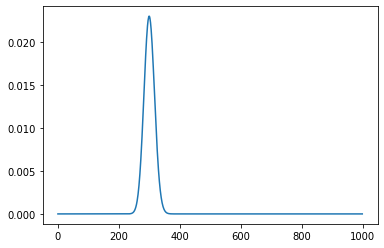

In [18]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)